In [21]:
from scripts1 import project_functions
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dataT = project_functions.load_and_process("../data/raw/AirQualityUCI.csv")
dataT#loading the dataset to make sure it works


,Date,Hour of Day,CO(GT),"Tin Oxide (CO, S1)",Non Metal HydroCarbon (GT),Benzene(GT),"Titania (NMHC, S2)",NOx(GT),"Tungsten Oxide(NOx, S3)",NO2(GT),"Tungsten Oxide(NO2, S4)","Indium Oxide (O3, S5)",Temperature,Relative Humidity,Absolute Humidity
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,30/04/2004,20.00.00,4.4,1449.0,501.0,19.5,1282.0,254.0,625.0,133.0,2100.0,1569.0,19.1,61.1,1.3345
1227,30/04/2004,21.00.00,3.1,1363.0,234.0,15.1,1152.0,189.0,684.0,110.0,1951.0,1495.0,18.2,65.4,1.3529
1228,30/04/2004,22.00.00,3.0,1371.0,212.0,14.6,1136.0,174.0,689.0,102.0,1927.0,1471.0,18.1,66.1,1.3579
1229,30/04/2004,23.00.00,3.1,1406.0,275.0,13.7,1107.0,167.0,718.0,108.0,1872.0,1384.0,17.7,66.9,1.3422


<AxesSubplot:>

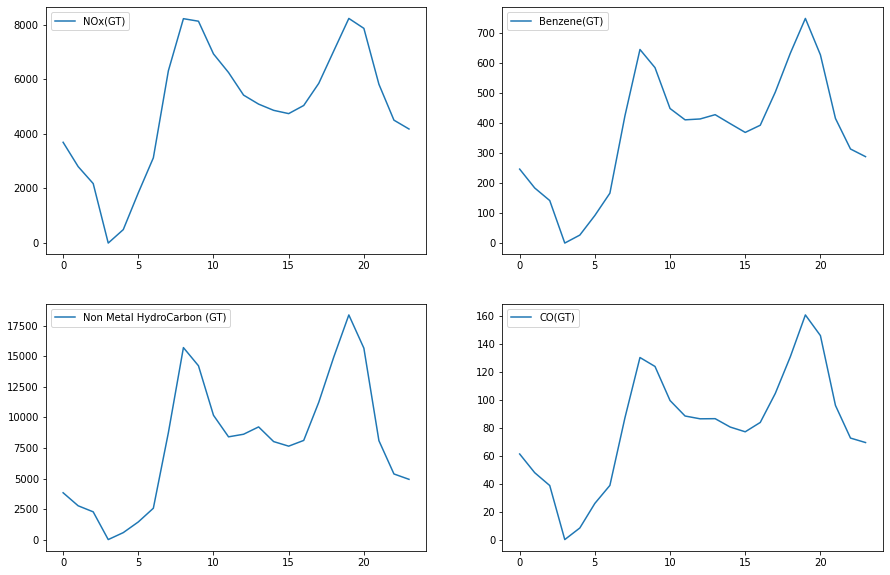

In [41]:
#convert time of day to int and sum up yearly concentration into one value

data2 = pd.DataFrame(columns = ["CO(GT)","NOx(GT)", "Benzene(GT)", "Non Metal HydroCarbon (GT)", "Hour of Day"])
data3 = pd.DataFrame(columns = ["CO(GT)","NOx(GT)", "Benzene(GT)", "Non Metal HydroCarbon (GT)", "Hour of Day"])

data3["Hour of Day"] = np.arange(start=0, stop=24, step=1)
data2['Hour of Day'] = data['Hour of Day'].apply(lambda s: int(s.split('.')[0]))
data2["Benzene(GT)"], data2["NOx(GT)"], data2["Non Metal HydroCarbon (GT)"], data2["CO(GT)"] = data["Benzene(GT)"], data["NOx(GT)"], data["Non Metal HydroCarbon (GT)"], data["CO(GT)"]

#put the sums in one place
s = 0
for i in range(24):
    s=data2.loc[data2['Hour of Day'] == i]["Benzene(GT)"].sum()
    data3.loc[i, "Benzene(GT)"]= s
    s=data2.loc[data2['Hour of Day'] == i]["NOx(GT)"].sum()
    data3.loc[i,"NOx(GT)"]= s
    s=data2.loc[data2['Hour of Day'] == i]["Non Metal HydroCarbon (GT)"].sum()
    data3.loc[i, "Non Metal HydroCarbon (GT)"]= s
    s=data2.loc[data2['Hour of Day'] == i]["CO(GT)"].sum()
    data3.loc[i, "CO(GT)"]= s

#set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

#graph data
df = data3.filter(['NOx(GT)'], axis=1)
df.plot(ax=axes[0,0])
df = data3.filter(['Benzene(GT)'], axis=1)
df.plot(ax=axes[0,1])
df = data3.filter(['Non Metal HydroCarbon (GT)'], axis=1)
df.plot(ax=axes[1,0])
df = data3.filter(['CO(GT)'], axis=1)
df.plot(ax=axes[1,1])



,NOx(GT),Benzene(GT),Non Metal HydroCarbon (GT),Hour of Day
NOx(GT),1.000000,0.927304,0.811182,0.277775
Benzene(GT),0.927304,1.000000,0.897928,0.319689
Non Metal HydroCarbon (GT),0.811182,0.897928,1.000000,0.280406
Hour of Day,0.277775,0.319689,0.280406,1.000000
